In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats

In [2]:
import matplotlib as mpl
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(16,14,12,12)

## N = 37

In [ ]:
Ne = 37
Ns = 74
#non-thermal iterations
M0 = int(5e5)
M = int(5e6)

step = 0.05
t = 1j

boundaries = np.arange(0.08, 0.33, 0.015)
ps = np.zeros((boundaries.size,2))
for i in range(boundaries.size):
    signs = np.loadtxt(f"free_fermions_mod_Ne_37_Ns_74_t_1.00_circle_{boundaries[i]:.3f}_step_0.050.dat")
    ps[i] = signs
np.savetxt(f"free_fermions_mod_Ne_37_Ns_74_t_1.00_step_0.050_circles.dat", np.vstack((boundaries, ps.T)).T)

#Lxs = np.arange(10,91,10)
#Lys = 2*np.pi*Ns/Lxs
#rs = Lys/Lxs

In [ ]:
ps = np.loadtxt("CFL_entropy_results/free_fermions_circle_patch/free_fermions_p_Ne_37_Ns_74_t_1.00_step_0.050_circles.dat")
boundaries = ps[:,0]
p_means_free_fermions = ps[:,1]
p_vars_free_fermions = ps[:,2]

mods = np.loadtxt("CFL_entropy_results/free_fermions_circle_patch/free_fermions_mod_Ne_37_Ns_74_t_1.00_step_0.050_circles.dat")
mod_means_free_fermions = mods[:,1]
mod_vars_free_fermions = mods[:,2]

signs = np.loadtxt("CFL_entropy_results/free_fermions_circle_patch/free_fermions_sign_Ne_37_Ns_74_t_1.00_step_0.050_circles.dat")
sign_means_free_fermions = signs[:,1]
sign_vars_free_fermions = signs[:,2]

boundaries = boundaries[1:]
x = boundaries*np.sqrt(10*np.pi/37)*21.56283174194172

p_means_free_fermions = p_means_free_fermions[1:]
p_vars_free_fermions = p_vars_free_fermions[1:]

mod_means_free_fermions = mod_means_free_fermions[1:]
mod_vars_free_fermions = mod_vars_free_fermions[1:]

sign_means_free_fermions = sign_means_free_fermions[1:]
sign_vars_free_fermions = sign_vars_free_fermions[1:]

In [ ]:
S_MC_free_fermions = -np.log(p_means_free_fermions*mod_means_free_fermions*sign_means_free_fermions)
err_free_fermions = np.sqrt(p_vars_free_fermions/(p_means_free_fermions**2) + mod_vars_free_fermions/(mod_means_free_fermions**2) + sign_vars_free_fermions/(sign_means_free_fermions**2))/np.sqrt(M-M0)

popt, pcov = np.polyfit(np.log(x), S_MC_free_fermions/x, deg=1, cov=True)

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10,4))

ax[0].errorbar(np.log(x), (S_MC_free_fermions/x), err_free_fermions, marker='x',
             color='k', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='Fermi Sea $N=37$')
#ax[0].set_title("Renyi entropy $S_{2}$, free fermions $N=37$")
ax[0].set_ylabel("$S_{2}/\\lambda$")
ax[0].set_xlabel("$\\ln (\\lambda)$")
fit = np.arange(0.5,2,0.1)
ax[0].plot(fit, popt[0]*fit+popt[1], color='k', linestyle='dashed',
           linewidth=1, label='$\\kappa_{W} \\approx 0.234$')
ax[0].legend()

ax[1].errorbar(np.log(x), -np.log(p_means_free_fermions*mod_means_free_fermions)/x, np.sqrt(p_vars_free_fermions/p_means_free_fermions**2+mod_vars_free_fermions/mod_means_free_fermions**2)/np.sqrt(M-M0), marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', label='mod')
#plt.errorbar(np.log(x), -np.log(mod_means_free_fermions)/x, np.sqrt(mod_vars_free_fermions/mod_means_free_fermions**2)/np.sqrt(M-M0), marker='x',
#             color='red', markersize=7, capsize=7)
ax[1].errorbar(np.log(x), -np.log(sign_means_free_fermions)/x, np.sqrt(sign_vars_free_fermions/sign_means_free_fermions**2)/np.sqrt(M-M0), marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', label='sign')
#ax[1].set_title("Mod/sign decomposition")
ax[1].set_xlabel("$\\ln (\\lambda)$")
ax[1].set_ylabel("$S_{2}/\\lambda$")

ax[1].legend(loc='center left')

## N = 69

In [25]:
Ne = 69
Ns = 138
#non-thermal iterations
M0 = int(1e5)
M = int(1e7)

step = 0.038
t = 1j

Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
Ly = Lx*np.imag(t)

boundaries = np.arange(0.08, 0.301, 0.01)

In [26]:
ps = np.zeros((boundaries.size,2))
mods = np.zeros((boundaries.size,2))
signs = np.zeros((boundaries.size,2))
for i in range(boundaries.size):
    data = np.loadtxt(f"CFL_entropy_results/N_69/MC/free_fermions_p_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    ps[i] = data
    data = np.loadtxt(f"CFL_entropy_results/N_69/MC/free_fermions_mod_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    mods[i] = data
    data = np.loadtxt(f"CFL_entropy_results/N_69/MC/free_fermions_sign_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    signs[i] = data[0,:]

np.savetxt(f"free_fermions_Ne_{Ne}_Ns_{Ns}_t_1.00_step_{step:.3f}_circles.dat", np.vstack((boundaries, ps.T, mods.T, signs.T)).T)


In [64]:
data = np.loadtxt(f"free_fermions_Ne_{Ne}_Ns_{Ns}_t_1.00_step_{step:.3f}_circles.dat")
boundaries = data[:,0]
p_means_free_fermions = data[:,1]
p_vars_free_fermions = data[:,2]
mod_means_free_fermions = data[:,3]
mod_vars_free_fermions = data[:,4]
sign_means_free_fermions = data[:,5]
sign_vars_free_fermions = data[:,6]


boundaries = boundaries
x = boundaries*np.sqrt(20*np.pi/Ne)*Ly
p_means_free_fermions = p_means_free_fermions
p_vars_free_fermions = p_vars_free_fermions

mod_means_free_fermions = mod_means_free_fermions
mod_vars_free_fermions = mod_vars_free_fermions

sign_means_free_fermions = sign_means_free_fermions
sign_vars_free_fermions = sign_vars_free_fermions


In [69]:
S_MC_free_fermions = -np.log(p_means_free_fermions*mod_means_free_fermions*sign_means_free_fermions)
err_free_fermions = np.sqrt(p_vars_free_fermions/(p_means_free_fermions**2) + mod_vars_free_fermions/(mod_means_free_fermions**2) + sign_vars_free_fermions/(sign_means_free_fermions**2))/np.sqrt(M-M0)

popt, pcov = np.polyfit(np.log(x)[:-5], S_MC_free_fermions[:-5]/x[:-5], deg=1, w=1/err_free_fermions[:-5], cov=True)

In [70]:
popt, np.sqrt(pcov[0,0])

(array([0.25249378, 0.55050957]), 0.006937074224980883)

In [71]:
boundaries_ED = np.arange(0.08, 0.421, 0.01)
S_ED = np.zeros(boundaries_ED.size)
x_ED = boundaries_ED*np.sqrt(20*np.pi/Ne)*Ly

for i in range(boundaries_ED.size):
    matrix = np.load(f"free_fermions_overlaps_N_69_circle_{boundaries_ED[i]:.3f}.npy")
    e, _ = np.linalg.eigh(matrix)
    S_ED[i] = -np.sum(np.log(e**2 + (1-e)**2))

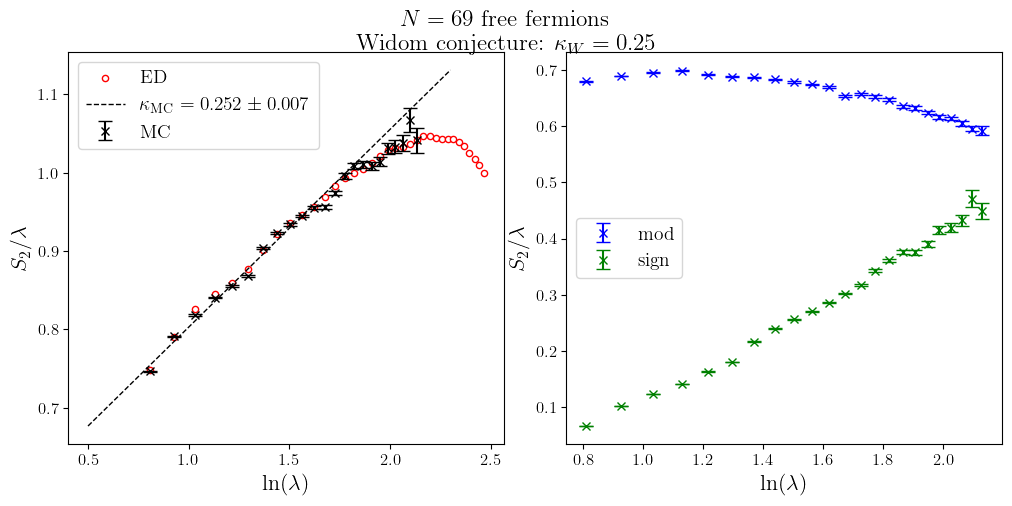

In [99]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
#fig.subplots_adjust(bottom=-1)
fig.suptitle("$N = 69$ free fermions \n Widom conjecture: $\kappa_{W} = 0.25$ ", va='top')
ax[0].errorbar(np.log(x), (S_MC_free_fermions/x), err_free_fermions, marker='x',
             color='k', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label='MC')
#ax[0].set_title("Renyi entropy $S_{2}$, free fermions $N=37$")
ax[0].scatter(np.log(x_ED), (S_ED/x_ED), facecolor='white', edgecolor='red', marker='o', s=20,
              label='ED')
ax[0].set_ylabel("$S_{2}/\\lambda$")
ax[0].set_xlabel("$\\ln (\\lambda)$")
fit = np.arange(0.5,2.4,0.1)
ax[0].plot(fit, popt[0]*fit+popt[1], color='k', linestyle='dashed',
           linewidth=1, label='$\\kappa_\\mathrm{MC}$ '+f'$ = {popt[0]:.3f} \\pm {np.sqrt(pcov[0,0]):.3f}$')
ax[0].legend()

ax[1].errorbar(np.log(x), -np.log(p_means_free_fermions*mod_means_free_fermions)/x, np.sqrt(p_vars_free_fermions/p_means_free_fermions**2+mod_vars_free_fermions/mod_means_free_fermions**2)/np.sqrt(M-M0), marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', label='mod')
#plt.errorbar(np.log(x), -np.log(mod_means_free_fermions)/x, np.sqrt(mod_vars_free_fermions/mod_means_free_fermions**2)/np.sqrt(M-M0), marker='x',
#             color='red', markersize=7, capsize=7)
ax[1].errorbar(np.log(x), -np.log(sign_means_free_fermions)/x, np.sqrt(sign_vars_free_fermions/sign_means_free_fermions**2)/np.sqrt(M-M0), marker='x',
             color='green', markersize=6, capsize=5, linestyle='none', label='sign')
#ax[1].set_title("Mod/sign decomposition")
ax[1].set_xlabel("$\\ln (\\lambda)$")
ax[1].set_ylabel("$S_{2}/\\lambda$")

ax[1].legend(loc='center left')

fig.tight_layout(pad=0.2)

N = 69